In [1]:
# import statements

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings

warnings.simplefilter('ignore')
%matplotlib inline

In [4]:
# Read the dataset
survey = pd.read_csv("./survey_results_public.csv")
survey.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [5]:
#select the features needed and use those coloumns in a separate dataframe called df
df = survey[['Student', 'Hobby', 'Age']]
#create another column to show our predicted results 
df["CodingHobby"] = ""
df.head()

,Student,Hobby,Age,CodingHobby
0,No,Yes,25 - 34 years old,
1,No,Yes,35 - 44 years old,
2,No,Yes,NaN,
3,No,No,35 - 44 years old,
4,"Yes, part-time",Yes,18 - 24 years old,


In [6]:
#numerical categorization of student. convert string answer values into numbers 
def convert_student(df):

    conditions_student = [(df['Student'] == 'Yes'),
                      (df['Student'] == 'No'),]

    choices_student = [0, 1]
#create a separate column that will hold the numerical categorization of student in the df that was created 
    df['Student_Num'] = np.select(conditions_student, choices_student)
    
    return df

df = convert_student(df)

In [7]:
#numerical categorization of hobby. convert string answer values into numbers 
def convert_hobby(df):

    conditions_hobby = [(df['Hobby'] == 'Yes'),
                      (df['Hobby'] == 'No'),]

    choices_hobby = [0, 1]
#create a separate column that will hold the numerical categorization of hobby in the df that was created 
    df['Hobby_Num'] = np.select(conditions_hobby, choices_hobby)
    
    return df

df = convert_hobby(df)

In [8]:
#numerical categorization of age. convert string answer values into numbers 
def convert_age(df):

    conditions_age = [(df['Age'] == 'Under 18 years old'),
                      (df['Age'] == '18 - 24 years old'),
                      (df['Age'] == '25 - 34 years old'),
                      (df['Age'] == '35 - 44 years old'),
                      (df['Age'] == '45 - 54 years old'),
                      (df['Age'] == '55 - 64 years old'),
                      (df['Age'] == '65 years or older')]

    choices_age = [16, 21, 30, 40, 50, 60, 70]
#create a separate column that will hold the numerical categorization of age in the df that was created 
    df['Age_Num'] = np.select(conditions_age, choices_age, default = np.NaN)
    
    return df

df = convert_age(df)

In [9]:
df.head()

,Student,Hobby,Age,CodingHobby,Student_Num,Hobby_Num,Age_Num
0,No,Yes,25 - 34 years old,,1,0,30.0
1,No,Yes,35 - 44 years old,,1,0,40.0
2,No,Yes,NaN,,1,0,NaN
3,No,No,35 - 44 years old,,1,1,40.0
4,"Yes, part-time",Yes,18 - 24 years old,,0,0,21.0


In [10]:
#create a separate dataframe with the features that have been numerically classified
df = df[['Age_Num', 'Hobby_Num', 'Student_Num']]

In [11]:
df = df.dropna()

In [12]:
df.head()

,Age_Num,Hobby_Num,Student_Num
0,30.0,0,1
1,40.0,0,1
3,40.0,1,1
4,21.0,0,0
5,21.0,0,1


In [13]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
y = df['Hobby_Num']
# Remove the labels from the features
# axis 1 refers to the columns
X= df.drop('Hobby_Num', axis = 1)
# Saving feature names for later use
df_list = list(df.columns)
# Convert to numpy array
df = np.array(df)

In [14]:
y.head()

0    0
1    0
3    1
4    0
5    0
Name: Hobby_Num, dtype: int64

In [15]:
df

array([[30.,  0.,  1.],
       [40.,  0.,  1.],
       [40.,  1.,  1.],
       ...,
       [16.,  0.,  1.],
       [16.,  0.,  1.],
       [70.,  1.,  1.]])

## Prediction using Random Forest Classification

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, accuracy_score, classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [17]:
print("ACCURACY SCORE={}".format(accuracy_score(Y_test, Y_pred)))

ACCURACY SCORE=0.821447928765002


In [18]:
mean_absolute_error(Y_test, Y_pred)

0.17855207123499806

In [19]:
mean_squared_error(Y_test, Y_pred)

0.17855207123499806

In [20]:
# CLASSIFICATION REPORT

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     10609
           1       0.00      0.00      0.00      2306

   micro avg       0.82      0.82      0.82     12915
   macro avg       0.41      0.50      0.45     12915
weighted avg       0.67      0.82      0.74     12915



## Prediction using Support Vector Machine

In [21]:
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 10 )
clf = svm.SVC(gamma='auto')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print(accuracy_score(Y_test, Y_pred))

0.8212156407278358


In [22]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
print("ACCURACY SCORE={}".format(accuracy_score(Y_test, Y_pred)))

ACCURACY SCORE=0.8212156407278358


In [24]:
mean_squared_error(Y_test, Y_pred)

0.17878435927216416

In [25]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     10606
           1       0.00      0.00      0.00      2309

   micro avg       0.82      0.82      0.82     12915
   macro avg       0.41      0.50      0.45     12915
weighted avg       0.67      0.82      0.74     12915



# Prediction using Linear Regression

In [26]:
# Data preprocessing for Prediction using Linear Regression

survey = survey[pd.notnull(survey['DevType'])]

In [27]:
list(survey.columns)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

In [28]:
to_drop = ['Respondent','AssessJob1','AssessJob2','AssessJob3','AssessJob4','AssessJob5','AssessJob6','AssessJob7','AssessJob8',
           'AssessJob9','AssessJob10','AssessBenefits1','AssessBenefits2','AssessBenefits3','AssessBenefits4','AssessBenefits5',
           'AssessBenefits6','AssessBenefits7','AssessBenefits8','AssessBenefits9','AssessBenefits10','AssessBenefits11',
           'JobContactPriorities1','JobContactPriorities2','JobContactPriorities3','JobContactPriorities4','JobContactPriorities5',
           'JobEmailPriorities1','JobEmailPriorities2','JobEmailPriorities3','JobEmailPriorities4','JobEmailPriorities5',
           'JobEmailPriorities6','JobEmailPriorities7','Currency','Salary','SalaryType','ConvertedSalary','CurrencySymbol',
           'HackathonReasons','AgreeDisagree1','AgreeDisagree2','AgreeDisagree3','AdBlocker','AdBlockerDisable',
           'AdBlockerReasons','AdsAgreeDisagree1','AdsAgreeDisagree2','AdsAgreeDisagree3','AdsActions','AdsPriorities1',
           'AdsPriorities2','AdsPriorities3','AdsPriorities4','AdsPriorities5','AdsPriorities6','AdsPriorities7',
           'HypotheticalTools1','HypotheticalTools2','HypotheticalTools3','HypotheticalTools4','HypotheticalTools5',
           'SexualOrientation', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob','UpdateCV','DatabaseWorkedWith',
           'DatabaseDesireNextYear', 'PlatformWorkedWith','PlatformDesireNextYear', 'FrameworkWorkedWith',
           'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'NumberMonitors','Methodology', 'VersionControl', 
           'CheckInCode']
survey.drop(to_drop, inplace=True, axis=1)

In [29]:
survey.shape

(92098, 50)

In [30]:
survey['FormalEducation'].value_counts().nlargest(10)

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              41848
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           20399
Some college/university study without earning a degree                                11070
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8510
Associate degree                                                                       2798
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2056
Primary/elementary school                                                              1545
Professional degree (JD, MD, etc.)                                                     1318
I never completed any formal education                                                  617
Name: FormalEducation, dtype: int64

In [31]:
survey['YearsCoding'].value_counts().nlargest(10)

3-5 years           22918
6-8 years           19051
9-11 years          11973
0-2 years           10310
12-14 years          7905
15-17 years          6033
18-20 years          4969
30 or more years     3408
21-23 years          2602
24-26 years          1818
Name: YearsCoding, dtype: int64

In [32]:
survey['JobSatisfaction'].value_counts().nlargest(10)

Moderately satisfied                  25854
Extremely satisfied                   12335
Slightly satisfied                     9962
Slightly dissatisfied                  7007
Moderately dissatisfied                6274
Neither satisfied nor dissatisfied     4943
Extremely dissatisfied                 2464
Name: JobSatisfaction, dtype: int64

In [33]:
def simplify_DevType(df):
   
    conditions_DevType = [(df['DevType'].str.contains('Data scientist') == True),
                         (df['DevType'].str.contains('Data scientist') == False)]

    choices_DevType = ['DS', 'Non-DS']

    df['New_DevType'] = np.select(conditions_DevType, choices_DevType, default = np.NaN)
    
    return df

survey = simplify_DevType(survey)

In [34]:
def simplify_gender(df):
    """Add a new field, Gender_New, to dataframe, containing simplified Gender values.
    
    Args:
    df: dataframe. Dataframe containing the field Gender.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, Gender_New.
    """
    conditions_gender = [(df['Gender'] == 'Male'),
                         (df['Gender'] == 'Female'),
                         (df['Gender'] != 'Male') & (df['Gender'] != 'Female') 
                         & (pd.isnull(df['Gender']) == False)]

    choices_gender = ['Male', 'Female', 'Other']

    df['Gender_New'] = np.select(conditions_gender, choices_gender, default = np.NaN)
    
    return df
                
survey = simplify_gender(survey)

In [35]:
survey.head()

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,Gender,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,New_DevType,Gender_New
0,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,...,Male,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,Non-DS,Male
1,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,...,Male,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,Non-DS,Male
2,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-DS,nan
3,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,...,Male,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,Non-DS,Male
4,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,...,Male,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,Non-DS,Male


In [36]:
new_survey = survey[['Age', 'YearsCoding', 'New_DevType']]

In [37]:
new_survey = new_survey.dropna()

In [38]:
# Convert Age to numeric
def convert_age(df):
    """Add a new field, Age_Num, to dataframe, containing numeric values equivalent to the midpoints of the corresponding
    Age range values.
    
    Args:
    df: dataframe. Dataframe containing the field Age.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, Age_Num.
    """
    conditions_age = [(df['Age'] == 'Under 18 years old'),
                      (df['Age'] == '18 - 24 years old'),
                      (df['Age'] == '25 - 34 years old'),
                      (df['Age'] == '35 - 44 years old'),
                      (df['Age'] == '45 - 54 years old'),
                      (df['Age'] == '55 - 64 years old'),
                      (df['Age'] == '65 years or older')]

    choices_age = [16, 21, 30, 40, 50, 60, 70]

    df['Age_Num'] = np.select(conditions_age, choices_age)
    
    return df

new_survey = convert_age(new_survey)

In [39]:
# Convert YearsCoding and YearsCodingProf to numeric
def convert_coding(df, col, new_col):
    """Add a new field, new_col, to dataframe, containing numeric values equivalent to the midpoints of the corresponding
    col range values.
    
    Args:
    df: dataframe. Dataframe containing the field col.
       
    Returns:
    df: dataframe. Modified version of the input dataframe containing a new field, new_col.
    """
    conditions_coding = [(df[col] == '0-2 years'),
                         (df[col] == '3-5 years'),
                         (df[col] == '6-8 years'),
                         (df[col] == '9-11 years'),
                         (df[col] == '12-14 years'),
                         (df[col] == '15-17 years'),
                         (df[col] == '18-20 years'),
                         (df[col] == '21-23 years'),
                         (df[col] == '24-26 years'),
                         (df[col] == '27-29 years'),
                         (df[col] == '30 or more years')]
    
    choices_coding = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31]
    
    df[new_col] = np.select(conditions_coding, choices_coding)
    
    return df

new_survey = convert_coding(new_survey, 'YearsCoding', 'YearsCoding_Num')


In [40]:
new_survey.head()

,Age,YearsCoding,New_DevType,Age_Num,YearsCoding_Num
0,25 - 34 years old,3-5 years,Non-DS,30,4
1,35 - 44 years old,30 or more years,Non-DS,40,31
3,35 - 44 years old,18-20 years,Non-DS,40,19
4,18 - 24 years old,6-8 years,Non-DS,21,7
5,18 - 24 years old,6-8 years,Non-DS,21,7


Coefficients: 
 [[0.6329504]]
Mean squared error: 27.13
Variance score: 0.54


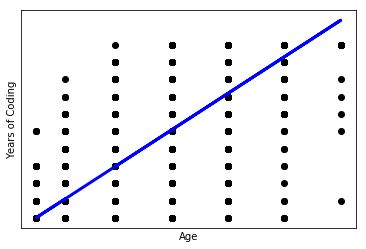

In [41]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X = new_survey['Age_Num']
X = np.vstack(new_survey.Age_Num)
y = new_survey.YearsCoding_Num
y = np.vstack(new_survey.YearsCoding_Num)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Years of Coding')
plt.xticks(())
plt.yticks(())

plt.show()

## Optimizing by adding features to train set

In [42]:
survey_2 = survey[['Age', 'YearsCoding', 'New_DevType', 'OpenSource', 'FormalEducation', 'YearsCodingProf', 
                     'JobSatisfaction', 'CareerSatisfaction']]

In [43]:
survey_2.shape

(92098, 8)

In [44]:
survey_2 = survey_2.dropna()

In [45]:
survey_2.shape

(54554, 8)

In [46]:
survey_2 = convert_age(survey_2)
survey_2 = convert_coding(survey_2, 'YearsCoding', 'YearsCoding_Num')
survey_2 = convert_coding(survey_2, 'YearsCodingProf', 'Years_Prof_Coding_Num')

In [47]:
survey_2.head()

,Age,YearsCoding,New_DevType,OpenSource,FormalEducation,YearsCodingProf,JobSatisfaction,CareerSatisfaction,Age_Num,YearsCoding_Num,Years_Prof_Coding_Num
0,25 - 34 years old,3-5 years,Non-DS,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,Extremely satisfied,Extremely satisfied,30,4,4
1,35 - 44 years old,30 or more years,Non-DS,Yes,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,40,31,19
3,35 - 44 years old,18-20 years,Non-DS,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",12-14 years,Neither satisfied nor dissatisfied,Slightly dissatisfied,40,19,13
4,18 - 24 years old,6-8 years,Non-DS,No,Some college/university study without earning ...,0-2 years,Slightly satisfied,Moderately satisfied,21,7,1
5,18 - 24 years old,6-8 years,Non-DS,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,Moderately satisfied,Slightly satisfied,21,7,4


In [48]:
d1 = pd.get_dummies(survey_2.New_DevType)
d2 = pd.get_dummies(survey_2.OpenSource)
d3 = pd.get_dummies(survey_2.FormalEducation)
d4 = pd.get_dummies(survey_2.JobSatisfaction)
d5 = pd.get_dummies(survey_2.CareerSatisfaction)

In [49]:
d1.head()

,DS,Non-DS
0,0,1
1,0,1
3,0,1
4,0,1
5,0,1


In [50]:
d2.head()

,No,Yes
0,1,0
1,0,1
3,1,0
4,1,0
5,1,0


In [51]:
df_dummies2 = pd.concat([survey_2,d1,d2,d3,d4,d5],axis='columns')
df_dummies2.head()

,Age,YearsCoding,New_DevType,OpenSource,FormalEducation,YearsCodingProf,JobSatisfaction,CareerSatisfaction,Age_Num,YearsCoding_Num,...,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied,Extremely dissatisfied,Extremely satisfied,Moderately dissatisfied,Moderately satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied
0,25 - 34 years old,3-5 years,Non-DS,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,Extremely satisfied,Extremely satisfied,30,4,...,0,0,0,0,1,0,0,0,0,0
1,35 - 44 years old,30 or more years,Non-DS,Yes,"Bachelor’s degree (BA, BS, B.Eng., etc.)",18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,40,31,...,0,0,0,0,0,0,0,1,0,0
3,35 - 44 years old,18-20 years,Non-DS,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",12-14 years,Neither satisfied nor dissatisfied,Slightly dissatisfied,40,19,...,1,0,0,0,0,0,0,0,1,0
4,18 - 24 years old,6-8 years,Non-DS,No,Some college/university study without earning ...,0-2 years,Slightly satisfied,Moderately satisfied,21,7,...,0,0,1,0,0,0,1,0,0,0
5,18 - 24 years old,6-8 years,Non-DS,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3-5 years,Moderately satisfied,Slightly satisfied,21,7,...,0,0,0,0,0,0,0,0,0,1


In [52]:
df_dummies2.drop(['New_DevType','OpenSource','FormalEducation','YearsCodingProf',
                    'JobSatisfaction', 'CareerSatisfaction', 'Age','YearsCoding'],axis='columns',inplace=True)

In [53]:
# predict yearscoding prof
X = df_dummies2.drop(['Years_Prof_Coding_Num'],axis='columns')
y = df_dummies2.Years_Prof_Coding_Num

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
y.head()

0     4
1    19
3    13
4     1
5     4
Name: Years_Prof_Coding_Num, dtype: int64

In [55]:
model.predict(X)

array([ 3.23248291, 21.11706543, 14.2253418 , ..., -1.97869873,
       14.85223389, 13.65441895])

In [56]:
model.score(X,y)

0.81006743759681

### using PCA

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [58]:
X_pca = pca.transform(X)

In [59]:
X_pca.shape

(54554, 1)

In [60]:
y.shape

(54554,)

Coefficients: 
 [0.57236587]
Mean squared error: 10.17
Variance score: 0.78


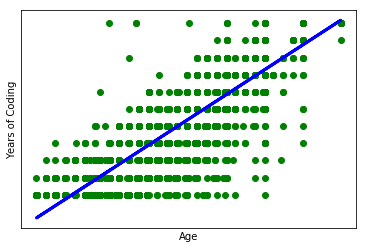

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=101)
# Create linear regression object
#regr = linear_model.LinearRegression()
# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs

plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Years of Coding')
plt.xticks(())
plt.yticks(())

plt.show()

# Analysis

In [64]:
survey_2017 = pd.read_csv('./2017/survey_results_public.csv')

In [65]:
survey_2017 = survey_2017[['DeveloperType','ProgramHobby','Country','YearsProgram','YearsCodedJob','CareerSatisfaction',
 'JobSatisfaction','Gender']]


In [66]:
survey_2017 = survey_2017[pd.notnull(survey_2017['DeveloperType'])]

In [67]:
def simplify_DevType(df):
   
    conditions_DevType = [(df['DeveloperType'].str.contains('Data scientist') == True),
                         (df['DeveloperType'].str.contains('Data scientist') == False)]

    choices_DevType = ['DS', 'Non-DS']

    df['New_DeveloperType'] = np.select(conditions_DevType, choices_DevType, default = np.NaN)
    
    return df

survey_2017 = simplify_DevType(survey_2017)

In [68]:
survey_2017.head()

,DeveloperType,ProgramHobby,Country,YearsProgram,YearsCodedJob,CareerSatisfaction,JobSatisfaction,Gender,New_DeveloperType
2,Other,"Yes, both",United Kingdom,20 or more years,20 or more years,8.0,9.0,Male,Non-DS
4,Mobile developer; Graphics programming; Deskto...,"Yes, I program as a hobby",Switzerland,20 or more years,10 to 11 years,6.0,8.0,NaN,Non-DS
7,Web developer,"Yes, both",Poland,10 to 11 years,7 to 8 years,7.0,7.0,Male,Non-DS
8,Web developer; Mobile developer,"Yes, I program as a hobby",Colombia,13 to 14 years,7 to 8 years,6.0,6.0,Male,Non-DS
9,Mobile developer; Desktop applications developer,"Yes, I program as a hobby",France,13 to 14 years,8 to 9 years,6.0,8.0,Male,Non-DS


In [69]:
satisfaction_strs = {
    'Extremely satisfied': 7,
    'Moderately satisfied': 6,
    'Slightly satisfied': 5,
    'Neither satisfied nor dissatisfied': 4,
    'Slightly dissatisfied': 3,
    'Moderately dissatisfied' : 2,
    'Extremely dissatisfied' : 1
}

In [70]:
satisfy_key = ['JobSatisfaction', 'CareerSatisfaction']

In [71]:
replacers = [
    (satisfy_key, satisfaction_strs)]

In [72]:
def dict_map(dict_to_use):
    def mapper(val):
        if val in dict_to_use:
            return dict_to_use[val]
        else:
            return np.nan

    return mapper

In [73]:
for keys, strs in replacers:
    survey[keys] = survey[keys].applymap(dict_map(strs))

In [74]:
survey_2017 = simplify_gender(survey_2017)

In [75]:
survey_2017.head()

,DeveloperType,ProgramHobby,Country,YearsProgram,YearsCodedJob,CareerSatisfaction,JobSatisfaction,Gender,New_DeveloperType,Gender_New
2,Other,"Yes, both",United Kingdom,20 or more years,20 or more years,8.0,9.0,Male,Non-DS,Male
4,Mobile developer; Graphics programming; Deskto...,"Yes, I program as a hobby",Switzerland,20 or more years,10 to 11 years,6.0,8.0,NaN,Non-DS,nan
7,Web developer,"Yes, both",Poland,10 to 11 years,7 to 8 years,7.0,7.0,Male,Non-DS,Male
8,Web developer; Mobile developer,"Yes, I program as a hobby",Colombia,13 to 14 years,7 to 8 years,6.0,6.0,Male,Non-DS,Male
9,Mobile developer; Desktop applications developer,"Yes, I program as a hobby",France,13 to 14 years,8 to 9 years,6.0,8.0,Male,Non-DS,Male


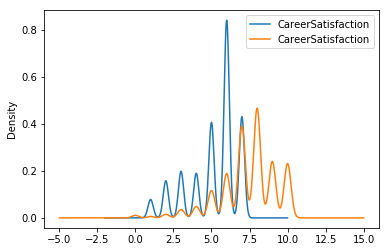

In [76]:
ax = survey.plot(x='JobSatisfaction', y='CareerSatisfaction', kind = 'kde')
survey_2017.plot(ax=ax, x='JobSatisfaction', y='CareerSatisfaction', kind = 'kde')

The above plot signifies that overall Career Satisfaction increased among people from 2017 to 2018

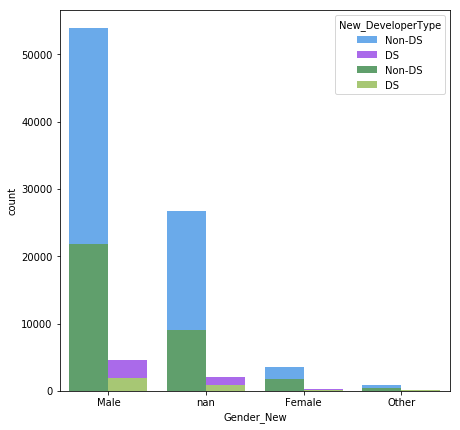

In [77]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x="Gender_New", hue="New_DevType", data=survey, palette = 'cool')
sns.countplot(ax = ax, x="Gender_New", hue="New_DeveloperType", data=survey_2017, palette = 'summer')

The above countplot signifies that there were far more Non-DS males in 2018 as compared to Non-DS males in 2017. Also the overall Count of developers almost doubled between 2017 and 2018

I'm excited about the possibilities more than worried about the dangers.        49917
I'm worried about the dangers more than I'm excited about the possibilities.    12996
I don't care about it, or I haven't thought about it.                            5561
Name: AIFuture, dtype: int64

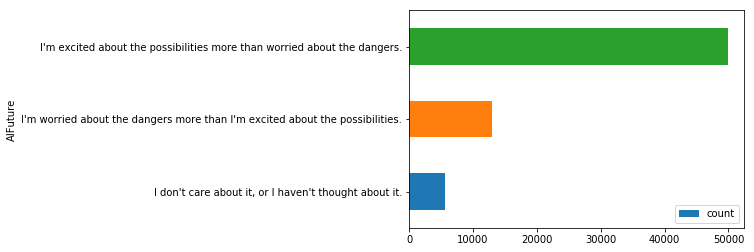

In [78]:
survey.groupby('AIFuture')['AIFuture'].agg(['count']).sort_values('count').reset_index().plot(x='AIFuture',y='count',kind='barh');
survey['AIFuture'].value_counts()


Algorithms making important decisions                                        17702
Artificial intelligence surpassing human intelligence ("the singularity")    17355
Evolving definitions of "fairness" in algorithmic versus human decisions     14692
Increasing automation of jobs                                                12284
Name: AIDangerous, dtype: int64

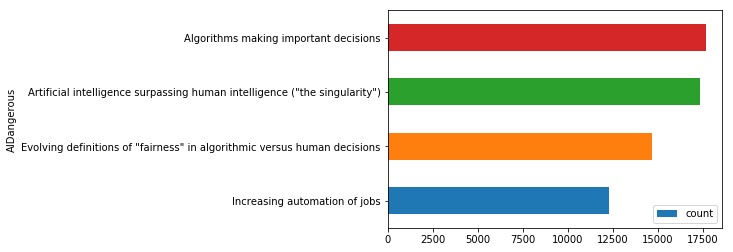

In [79]:
survey.groupby('AIDangerous')['AIDangerous'].agg(['count']).sort_values('count').reset_index().plot(x='AIDangerous',y='count',kind='barh');
survey['AIDangerous'].value_counts()

Increasing automation of jobs                                                26196
Algorithms making important decisions                                        15153
Artificial intelligence surpassing human intelligence ("the singularity")    14965
Evolving definitions of "fairness" in algorithmic versus human decisions      7959
Name: AIInteresting, dtype: int64

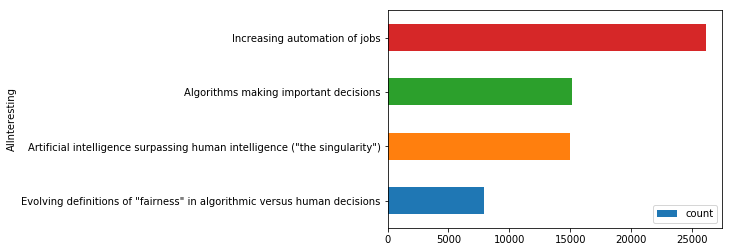

In [80]:
survey.groupby('AIInteresting')['AIInteresting'].agg(['count']).sort_values('count').reset_index().plot(x='AIInteresting',y='count',kind='barh');
survey['AIInteresting'].value_counts()


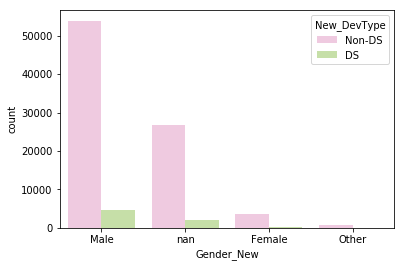

In [81]:
ax = sns.countplot(x="Gender_New", hue="New_DevType", data=survey, palette = 'PiYG')

In [82]:
#Job Satisfaction among people

count_JobSatisfaction = Counter(survey.JobSatisfaction)

In [83]:
count_JobSatisfaction = {k: count_JobSatisfaction[k] for k in count_JobSatisfaction if not pd.isnull(k)}

sizes = count_JobSatisfaction.values()
labels = count_JobSatisfaction.keys()


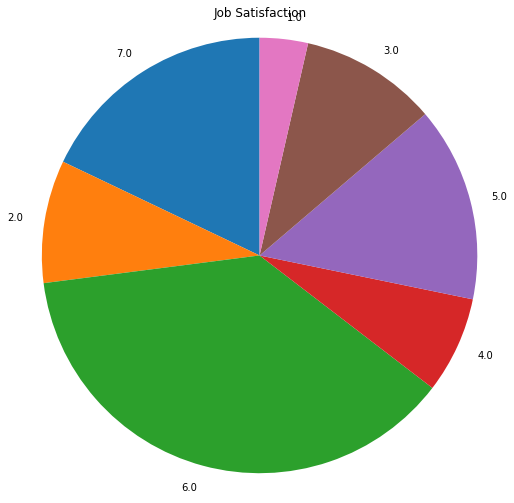

In [84]:
plt.figure(figsize=(7,7))
patches, texts = plt.pie(sizes, startangle=90, labels = labels)
#plt.legend(patches, loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.title('Job Satisfaction')
plt.show()